2018-06-03T19:20:00.000000000 2018-06-04T23:39:00.000000000


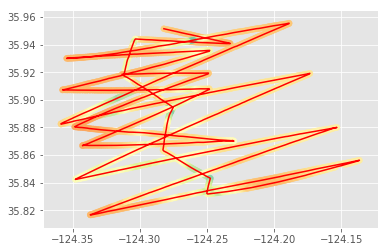

In [75]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from copy import copy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import numpy.ma as ma
#from netCDF4 import Dataset, date2index, num2date
from palettable import colorbrewer
#from datetime import datetime, timedelta
#import matplotlib.colors as colors
#import matplotlib.mlab as mlaba
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)
cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap

filename_loggers_out_nc='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1_withloggers.nc'
ds=xr.open_dataset(filename_loggers_out_nc)
#eddy exploration
i1, i2=76400,78100
plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'r')
plt.scatter(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],c=ds.TEMP_CTD_MEAN[0,i1:i2],
            cmap=cmap, vmin = 13, vmax = 15.5)
print(ds.time[0,i1:i2].data.min(),ds.time[0,i1:i2].data.max())


In [76]:
tem2=(ds.time[0,i2].values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
tem3=datetime.utcfromtimestamp(tem2)
day_of_year = tem3.timetuple().tm_yday
print(day_of_year)
filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst' + str(day_of_year) + '.nc'
ds_sst = xr.open_dataset(filename_out_nc)
ds_sst

155


<xarray.Dataset>
Dimensions:                  (lat: 950, lon: 1000)
Coordinates:
  * lon                      (lon) float32 -129.99 -129.97 ... -110.03 -110.01
  * lat                      (lat) float32 41.99 41.97 41.95 ... 23.03 23.010002
Data variables:
    sea_surface_temperature  (lat, lon) float32 ...

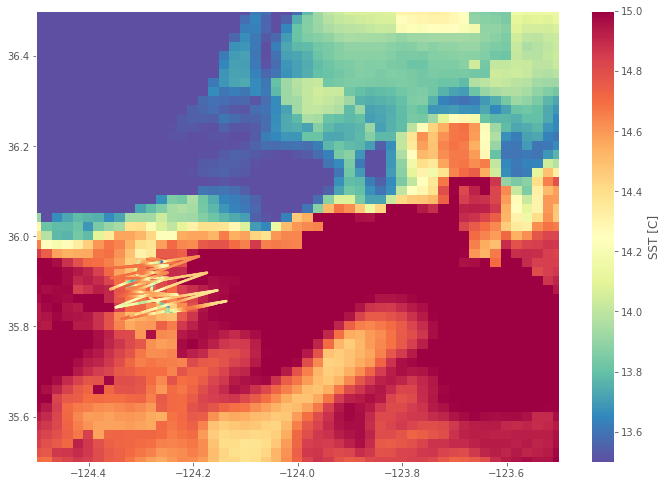

In [99]:
fig = plt.figure(figsize=(11.7,8.3))
cs = plt.pcolormesh(ds_sst.lon,ds_sst.lat, ds_sst.sea_surface_temperature - 273.15, 
                    cmap=cmap, vmin = 13.5, vmax = 15)
i1, i2=76400,78100
#plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'W', linewidth=1)
plt.scatter(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],s=4,c=ds.TEMP_CTD_MEAN[0,i1:i2],
            cmap=cmap, vmin = 13.5, vmax = 15)
plt.axis([-124.5,-123.5, 35.5,36.5])
cs = plt.colorbar(cs) 
cs.set_label('SST [C]')

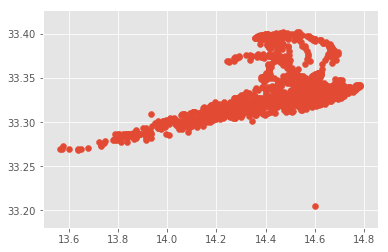

In [133]:
#plot normalized temperature and salinity across this eddy we were sampling
i1, i2=76500,77200
#plt.plot(ds.longitude[0,i1:i2],ds.TEMP_CTD_MEAN[0,i1:i2])
#i1, i2=77100,77200
#i1, i2=76500,76600
#plt.plot(ds.latitude[0,i1:i2],ds.TEMP_CTD_MEAN[0,i1:i2],'b')#
#i1, i2=76680,76840
#plt.plot(ds.longitude[0,i1:i2],ds.latitude[0,i1:i2],'b')
#plt.plot(ds.longitude[0,i1:i2],ds.TEMP_CTD_MEAN[0,i1:i2],'b')
#plt.plot(ds.longitude[0,i1:i2],ds.SAL_MEAN[0,i1:i2],'b')
i1, i2=76400,78100
plt.scatter(ds.TEMP_CTD_MEAN[0,i1:i2],ds.SAL_MEAN[0,i1:i2])


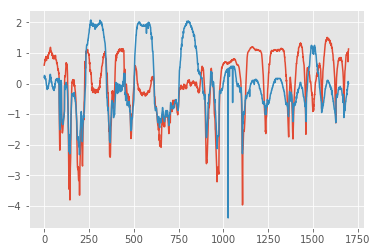

In [96]:
#plot normalized temperature and salinity across this eddy we were sampling
plt.plot((ds.TEMP_CTD_MEAN[0,i1:i2]-ds.TEMP_CTD_MEAN[0,i1:i2].mean())/ds.TEMP_CTD_MEAN[0,i1:i2].std())
plt.plot((ds.SAL_MEAN[0,i1:i2]-ds.SAL_MEAN[0,i1:i2].mean())/ds.SAL_MEAN[0,i1:i2].std())

In [78]:
ds

<xarray.Dataset>
Dimensions:                               (obs: 86839, trajectory: 1)
Coordinates:
  * trajectory                            (trajectory) float32 1002.0
    time                                  (trajectory, obs) datetime64[ns] ...
    latitude                              (trajectory, obs) float64 ...
    longitude                             (trajectory, obs) float64 ...
Dimensions without coordinates: obs
Data variables:
    SOG                                   (trajectory, obs) float64 ...
    COG                                   (trajectory, obs) float64 ...
    HDG                                   (trajectory, obs) float64 ...
    HDG_WING                              (trajectory, obs) float64 ...
    ROLL                                  (trajectory, obs) float64 ...
    PITCH                                 (trajectory, obs) float64 ...
    WING_ANGLE                            (trajectory, obs) float64 ...
    BARO_PRES_MEAN                        (trajecto